In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32  # Tamaño de lote.
image_size = (100, 100)
# Direccion del conjunto de datos
test_dir = '../../dataset/test'
# Crea un generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Crea el generador de datos de prueba
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No es necesario barajar el conjunto de prueba
)

Found 156 images belonging to 16 classes.


In [9]:
import tensorflow as tf

nombre_modelo = './modelos_guardados/modelo_final.h5'
# Cargar el modelo Keras desde un archivo .h5
modelo = tf.keras.models.load_model(nombre_modelo)

predictions = modelo.predict(test_data)

5/5 [==============================] - 4s 563ms/step


In [ ]:
pip install seaborn

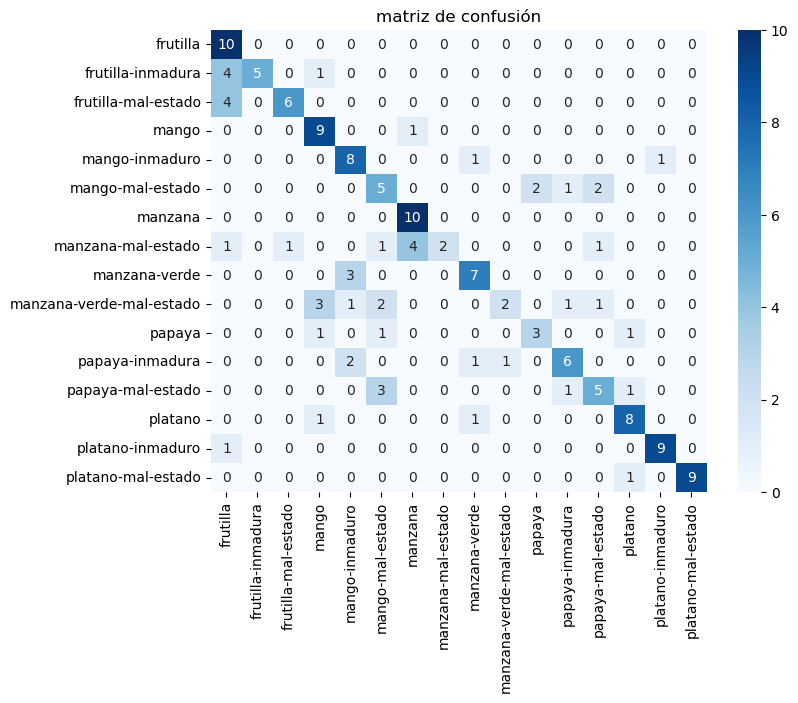

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Suponiendo que ya has hecho predicciones en el conjunto de prueba (predictions)
# y tienes las etiquetas reales del conjunto de prueba (test_generator.classes)

# Convertir las probabilidades a clases binarias (0 o 1) usando un umbral de 0.5
y_pred_binary = np.argmax(predictions, axis=1)
y_true = test_data.classes

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Obtener las etiquetas de las clases
class_names = test_data.class_indices.keys()

# Crear un objeto de figura y ejes
plt.figure(figsize=(8, 6))

# Crear un mapa de calor con seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Añadir etiquetas y título
plt.title('matriz de confusión')

# Mostrar el gráfico
plt.show()